In [2]:
!pip install joblib

In [3]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.4 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import regex as re
import string
import Sastrawi
import joblib
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


#word cloud
from wordcloud import WordCloud

#Input Data

##Text Dataset

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
file_path = '/content/drive/MyDrive/Tugas Akhire/Dataset/product_reviews_dirty.csv'

#load dataset
full_df = pd.read_csv(file_path)
full_df.sample(25)

,Unnamed: 0,text,rating,category,product_name,product_id,sold,shop_id,product_url
39892,40178,Barang cepat sampai and sesuai deskripsi.........,4,olahraga,ABS AB Roller Double Wheel Exercise Kettler,126912951,635,162561,https://www.tokopedia.com/warungolahraga/abs-a...
15702,15805,Keren keren keren dan keren keren keren,5,fashion,JAM TANGAN WANITA FASHION RUBBER ANAK QQ Q&amp...,380372624,352,3828997,https://www.tokopedia.com/fashionwatchhome/jam...
32170,32425,ok..............................,4,elektronik,LOGITECH WIRELESS MOUSE M170 ORIGINAL 100%,156280474,32,1884654,https://www.tokopedia.com/sjkomputer/logitech-...
11492,11571,Terima kasih barang sudah saya terima sesuai p...,5,fashion,"Sepatu Bata Fynn Black - 5716409 - Hitam, 36",265667787,1,2226118,https://www.tokopedia.com/bata-official/sepatu...
38116,38393,Mantab dan cepat tanggap. Terimakasih ya gan.\...,5,olahraga,Deker / Dekker Lutut / Knee Support LP 758 Ope...,19279911,287,162561,https://www.tokopedia.com/warungolahraga/deker...
29067,29272,Mantapppppppp.....biar bintang berbicara,5,elektronik,Adaptor Charger Laptop Lenovo 20V-3.25/15V 3A/...,313022122,94,1787060,https://www.tokopedia.com/askompute/adaptor-ch...
7781,7833,Ok.. brg sesuai harga...........,5,handphone,Headset Bluetooth Mini S530 - Micro Sport Ster...,55299234,"4,4rb",113813,https://www.tokopedia.com/handphonetiam/headse...
32508,32768,"Sudah sampai, sesuai foto, thanks....",4,fashion,Kemeja Koko Keren Lengan Panjang - KKL 79,180218794,89,97026,https://www.tokopedia.com/gudang-fashion/kemej...
20196,20320,"Lumayan lah, respons juga cepet... thanks",4,elektronik,Mouse wireless / Bluetooth Airmouse Alcatroz b...,182677406,1rb,2048686,https://www.tokopedia.com/multikomputer201/mou...
30097,30317,produk asli pengiriman cepat..good seller,5,elektronik,TINTA / CATRIDGE HP 678 BLACK / COLOR ORIGINAL...,159390512,"5,6rb",1884654,https://www.tokopedia.com/sjkomputer/tinta-cat...


###Take only essential columns

Take text and rating columns

In [7]:
df = full_df.loc[:, ['text', 'rating']] #ambil semua baris, dari kolom text dan rating
df

,text,rating
0,Barang sesuai pesanan dan cepat sampai,5
1,Barang bagus harga murah,5
2,Paket rapi...mantap....cepat....sampe ke tujuan,5
3,ya saya puas dgn barangnya,5
4,Responya luar biasa b mantap,5
...,...,...
40602,gak bisa ditutup.. ukuran gak pas..,1
40603,Penjual krg peduli dan brg jelek. Brg yg dikir...,1
40604,"pelayanan kurang sigap, berhari2 dr nanya baik...",1
40605,"barang yg dikirim tsk sesuai wrn, kl memang dr...",1


##Split into train, validation, and testing dataset

##Antonym dataset

In [8]:
antonym_file_path = '/content/drive/MyDrive/Tugas Akhire/Dataset/antonim_bahasa_indonesia.csv'
antonim = pd.read_csv(antonym_file_path)
antonim.head(10)

,word,antonim
0,abadi,sementara
1,abai,hirau
2,abang,adik
3,abdi,"kamu, juragan"
4,abnormal,normal
5,abnormalitas,"kenormalan, normalitas"
6,absah,ilegal
7,absen,hadir
8,absensi,kehadiran
9,absolut,"demokratis, nisbi, relatif"


#EDA

##Check how many missing value

In [9]:
missing_values_text = df['text'].isnull().sum()
missing_values_rating = df['rating'].isnull().sum()

missing_values_df = pd.DataFrame({'Jumlah Missing Value': [missing_values_text, missing_values_rating]}, index=['text', 'rating'])

missing_values_df

,Jumlah Missing Value
text,0
rating,0


Dapat terlihat bahwa setiap baris data tidak terdapat missing value.

##Check the "rating" distribution

In [10]:
df['rating'].describe()

count    40607.000000
mean         4.642574
std          0.732448
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

Dapat dilihat bahwa nilai-nilai pada kolom "rating" memiliki nilai minimum 1 dan maksimum 5 yang artinya semua data pada kolom rating ini sudah sesuai dengan yang seharusnya, yaitu memiliki nilai di rentang 1 sampai 5.

##Define label and check a sample of the data whether it fits the label

In [11]:
#buat fungsi untuk nge-map nilai pada rating menjadi positive, negative, atau netral
def map_rating_to_label(rating):
    if rating in [1, 2]:
        return 0
    elif rating in [4, 5]:
        return 1
    else:
        return -1

#apply fungsinya dan buat kolom baru pada dataframe
df['sentiment_label'] = df['rating'].apply(map_rating_to_label)
df.sample(5)

,text,rating,sentiment_label
26116,"Keren lah gambar joss , pokoknya terbaik recom...",5,1
794,Sudah dicoba dan berfungsi dengan baik.,4,1
5581,"Barang sdh diterima dgn kondisi baik, thx gan...",4,1
20677,Terimakasih barang sudah diterima dan sesuai p...,4,1
16793,Barang sudah diterima gan. Sampai order beriku...,4,1


In [12]:
df.to_csv('checking_dataset_label.csv')

Setelah dicek secara manual dengan mengambil beberapa sampel (100 masing-masing rating), tidak terlihat ada review yang nyeleneh (rating yang diberikan tidak sesuai review yang diberikan).

##Check label distribution and decide whether to oversample or undersample

In [13]:
label_distribution = df['sentiment_label'].value_counts()

#tampilkan distribusi labelnya
print("Label Distribution:")
print(label_distribution)

Label Distribution:
 1    37857
-1     1825
 0      925
Name: sentiment_label, dtype: int64


Karena jumlah sentimen negatif sangat sedikit, saya akan melakukan undersampling dengan hanya mengambil 905 review dengan label positive.

In [14]:
#pisahkan review positif dan negatif
positive_rows = df[df['sentiment_label'] == 1]
negative_rows = df[df['sentiment_label'] == 0]

#random sampling baris berlabel positive sebanyak jumlah review negatif (905 baris negatif)
positive_sampled = positive_rows.sample(n=len(negative_rows), random_state=42)

# #gabungkan ke df baru
# balanced_df = pd.concat([positive_sampled, negative_rows], ignore_index=True)

balanced_df = pd.read_csv('/content/drive/MyDrive/Tugas Akhire/Dataset/balanced_dataset.csv')
balanced_df['sentiment_label'] = balanced_df['rating'].apply(map_rating_to_label)
#shuffle
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

balanced_df

,text,rating,sentiment_label
0,Thks gan barang sudah nyampe,5,1
1,SANGAT BAIK DAN PENGIRIMAN CEPAT,5,1
2,barang yg di kirim udh sesuai sama gambar.. fa...,4,1
3,barang nya udah diterima imut dan bagus. thanks,5,1
4,Sudah memilih 3 pilihan warna.. tapi warna yg ...,2,0
...,...,...,...
1689,Nih gara&#34; salah pilih kurir jadi ane ngome...,1,0
1690,Thanks gan barangnya udah sampe,5,1
1691,produknya ukurannya melebar. gak sesuai gambar...,1,0
1692,"Keren jam nya puas, pengiriman cpt banget cm s...",5,1


In [15]:
#tampilkan distribusi labelnya
print("Distribusi label pada dataset yang telah diundersample:")
print(balanced_df['sentiment_label'].value_counts())

Distribusi label pada dataset yang telah diundersample:
1    847
0    847
Name: sentiment_label, dtype: int64


Dapat dilihat bahwa taset yang akan digunakan hanya akan memiliki 1694 baris dengan 847 data berlabel positif dan 847 berlabel negatif.

#Preprocessing

##Train Test Split

In [16]:
positive_samples = balanced_df[balanced_df['sentiment_label'] == 1]
negative_samples = balanced_df[balanced_df['sentiment_label'] == 0]

positive_train, positive_test = train_test_split(positive_samples, test_size=0.1, random_state=42)

negative_train, negative_test = train_test_split(negative_samples, test_size=0.1, random_state=42)

train_df = pd.concat([positive_train, negative_train])
test_df = pd.concat([positive_test, negative_test])

In [17]:
print("Jumlah label pada data training:")
print(train_df['sentiment_label'].value_counts())
print("\nJumlah label pada data testing:")
print(test_df['sentiment_label'].value_counts())

Jumlah label pada data training:
1    762
0    762
Name: sentiment_label, dtype: int64

Jumlah label pada data testing:
1    85
0    85
Name: sentiment_label, dtype: int64


In [18]:
train_df.to_csv('data training.csv')
test_df.to_csv('data testing.csv')

##Cleaning

In [19]:
def remove_emojis(text):
  return str(text.encode('ascii', 'ignore'))

def remove_punctuation(text):
    regex = re.compile('[%s]' % re.escape(string.punctuation))
    return regex.sub(' ', text)

In [20]:
def preprocess(text):
  text1 = text.lower()   # case folding
  text4 = remove_emojis(text1)
  text5 = re.sub(r"\d+", "", text4)   # remove numbers
  text6 = text5.replace('\\n',' ')    # hapus karakter '\n'
  text7 = remove_punctuation(text6)
  result = text7.strip()   # remove whitespace
  return result

train_df["preprocessed"] = train_df['text'].apply(preprocess)
train_df["preprocessed"] = train_df["preprocessed"].str[2:]

train_df

,text,rating,sentiment_label,preprocessed
90,barang nyampe nya cepet dan mulus maksih gan,4,1,barang nyampe nya cepet dan mulus maksih gan
1690,Thanks gan barangnya udah sampe,5,1,thanks gan barangnya udah sampe
369,Biar bintang yg berbicara,5,1,biar bintang yg berbicara
1308,Baik produk bagus sekali,5,1,baik produk bagus sekali
1550,"Barang sesuai pict,respon bgs,mksh..",4,1,barang sesuai pict respon bgs mksh
...,...,...,...,...
141,Barang tidak berfungsi seperti semestinya. Tid...,1,0,barang tidak berfungsi seperti semestinya tid...
207,barang cacat..beli 2 semua spekernya mati sebe...,2,0,barang cacat beli semua spekernya mati sebelah
537,saya kecewa gan... baru pakai sekali knapa lan...,2,0,saya kecewa gan baru pakai sekali knapa lan...
855,Bagus sich tapi sayang banget blm di pakai uda...,2,0,bagus sich tapi sayang banget blm di pakai uda...


##Menggabungkan "nya" dengan kata sebelumnya

In [21]:
def combine_nya_with_previous(text):
    words = text.split()
    combined_text = []
    i = 0
    while i < len(words):
        if words[i] == 'nya' and i > 0:
            combined_text[-1] += 'nya'  # Combine "nya" with the previous word
        else:
            combined_text.append(words[i])
        i += 1
    return ' '.join(combined_text)
train_df['combined_nya'] = train_df['preprocessed'].apply(combine_nya_with_previous)
train_df

,text,rating,sentiment_label,preprocessed,combined_nya
90,barang nyampe nya cepet dan mulus maksih gan,4,1,barang nyampe nya cepet dan mulus maksih gan,barang nyampenya cepet dan mulus maksih gan
1690,Thanks gan barangnya udah sampe,5,1,thanks gan barangnya udah sampe,thanks gan barangnya udah sampe
369,Biar bintang yg berbicara,5,1,biar bintang yg berbicara,biar bintang yg berbicara
1308,Baik produk bagus sekali,5,1,baik produk bagus sekali,baik produk bagus sekali
1550,"Barang sesuai pict,respon bgs,mksh..",4,1,barang sesuai pict respon bgs mksh,barang sesuai pict respon bgs mksh
...,...,...,...,...,...
141,Barang tidak berfungsi seperti semestinya. Tid...,1,0,barang tidak berfungsi seperti semestinya tid...,barang tidak berfungsi seperti semestinya tida...
207,barang cacat..beli 2 semua spekernya mati sebe...,2,0,barang cacat beli semua spekernya mati sebelah,barang cacat beli semua spekernya mati sebelah
537,saya kecewa gan... baru pakai sekali knapa lan...,2,0,saya kecewa gan baru pakai sekali knapa lan...,saya kecewa gan baru pakai sekali knapa lansun...
855,Bagus sich tapi sayang banget blm di pakai uda...,2,0,bagus sich tapi sayang banget blm di pakai uda...,bagus sich tapi sayang banget blm di pakai uda...


##Menggabungkan "di" dengan kata selanjutnya

In [22]:
def combine_di_with_next(text):
    words = text.split()
    combined_text = []
    i = 0
    while i < len(words):
        if words[i] == 'di' and i < len(words) - 1:
            combined_text.append('di' + words[i+1])  # Combine "di" with the next word
            i += 1
        else:
            combined_text.append(words[i])
        i += 1
    return ' '.join(combined_text)
train_df['combined_di'] = train_df['combined_nya'].apply(combine_di_with_next)
train_df

,text,rating,sentiment_label,preprocessed,combined_nya,combined_di
90,barang nyampe nya cepet dan mulus maksih gan,4,1,barang nyampe nya cepet dan mulus maksih gan,barang nyampenya cepet dan mulus maksih gan,barang nyampenya cepet dan mulus maksih gan
1690,Thanks gan barangnya udah sampe,5,1,thanks gan barangnya udah sampe,thanks gan barangnya udah sampe,thanks gan barangnya udah sampe
369,Biar bintang yg berbicara,5,1,biar bintang yg berbicara,biar bintang yg berbicara,biar bintang yg berbicara
1308,Baik produk bagus sekali,5,1,baik produk bagus sekali,baik produk bagus sekali,baik produk bagus sekali
1550,"Barang sesuai pict,respon bgs,mksh..",4,1,barang sesuai pict respon bgs mksh,barang sesuai pict respon bgs mksh,barang sesuai pict respon bgs mksh
...,...,...,...,...,...,...
141,Barang tidak berfungsi seperti semestinya. Tid...,1,0,barang tidak berfungsi seperti semestinya tid...,barang tidak berfungsi seperti semestinya tida...,barang tidak berfungsi seperti semestinya tida...
207,barang cacat..beli 2 semua spekernya mati sebe...,2,0,barang cacat beli semua spekernya mati sebelah,barang cacat beli semua spekernya mati sebelah,barang cacat beli semua spekernya mati sebelah
537,saya kecewa gan... baru pakai sekali knapa lan...,2,0,saya kecewa gan baru pakai sekali knapa lan...,saya kecewa gan baru pakai sekali knapa lansun...,saya kecewa gan baru pakai sekali knapa lansun...
855,Bagus sich tapi sayang banget blm di pakai uda...,2,0,bagus sich tapi sayang banget blm di pakai uda...,bagus sich tapi sayang banget blm di pakai uda...,bagus sich tapi sayang banget blm dipakai udah...


##Typo correction
Di sini, saya melakukan typo correction dengan mencari beberapa kata typo yang ada di dalam dataset. Saya membuat sebuah file .csv yang berisi 2 kolom dengan kolom pertama berisi kata yang typo dan kolom kedua berisi kata yang benar.

Cara typo correction yang saya implementasikan adalah dengan mengecek masing-masing kata  apabila terdapat pada kolom kata typo, maka ubah menjadi kata yang benar sesuai dengan kolom kata benar.

In [23]:
def correct_typo(text):
    corrections = pd.read_csv('/content/drive/MyDrive/Tugas Akhire/Dataset/typo_words.csv')

    corrections_dict = dict(zip(corrections['wrong'], corrections['right']))

    words = text.split()
    corrected_words = []

    for word in words:
        corrected_word = corrections_dict.get(word, word)
        corrected_words.append(corrected_word)

    corrected_text = ' '.join(corrected_words)

    return corrected_text

train_df['typo_corrected'] = train_df['combined_di'].apply(correct_typo)
train_df

,text,rating,sentiment_label,preprocessed,combined_nya,combined_di,typo_corrected
90,barang nyampe nya cepet dan mulus maksih gan,4,1,barang nyampe nya cepet dan mulus maksih gan,barang nyampenya cepet dan mulus maksih gan,barang nyampenya cepet dan mulus maksih gan,barang nyampenya cepet dan mulus maksih gan
1690,Thanks gan barangnya udah sampe,5,1,thanks gan barangnya udah sampe,thanks gan barangnya udah sampe,thanks gan barangnya udah sampe,thanks gan barangnya udah sampe
369,Biar bintang yg berbicara,5,1,biar bintang yg berbicara,biar bintang yg berbicara,biar bintang yg berbicara,biar bintang yang berbicara
1308,Baik produk bagus sekali,5,1,baik produk bagus sekali,baik produk bagus sekali,baik produk bagus sekali,baik produk bagus sekali
1550,"Barang sesuai pict,respon bgs,mksh..",4,1,barang sesuai pict respon bgs mksh,barang sesuai pict respon bgs mksh,barang sesuai pict respon bgs mksh,barang sesuai pict respon bgs terima kasih
...,...,...,...,...,...,...,...
141,Barang tidak berfungsi seperti semestinya. Tid...,1,0,barang tidak berfungsi seperti semestinya tid...,barang tidak berfungsi seperti semestinya tida...,barang tidak berfungsi seperti semestinya tida...,barang tidak berfungsi seperti semestinya tida...
207,barang cacat..beli 2 semua spekernya mati sebe...,2,0,barang cacat beli semua spekernya mati sebelah,barang cacat beli semua spekernya mati sebelah,barang cacat beli semua spekernya mati sebelah,barang cacat beli semua spekernya mati sebelah
537,saya kecewa gan... baru pakai sekali knapa lan...,2,0,saya kecewa gan baru pakai sekali knapa lan...,saya kecewa gan baru pakai sekali knapa lansun...,saya kecewa gan baru pakai sekali knapa lansun...,saya kecewa gan baru pakai sekali knapa lansun...
855,Bagus sich tapi sayang banget blm di pakai uda...,2,0,bagus sich tapi sayang banget blm di pakai uda...,bagus sich tapi sayang banget blm di pakai uda...,bagus sich tapi sayang banget blm dipakai udah...,bagus sich tetapi sayang banget belum dipakai ...


##Next Word Negation
Combining negation word with the next word with underscore (_)

In [24]:
def next_word_negation(text):
    words = text.split()
    negation_words = ['tidak', 'bukan', 'belum', 'tak', 'kurang']

    new_words = []
    skip_next = False
    for i in range(len(words)):
        if skip_next:
            skip_next = False
            continue
        if words[i] in negation_words and i < len(words) - 1:
            new_words.append(words[i] + "_" + words[i + 1])
            skip_next = True
        else:
            new_words.append(words[i])

    return ' '.join(new_words)

In [25]:
train_df['after_nwn_text'] = train_df['typo_corrected'].apply(next_word_negation)

##Swapping word after negation words with its antonym (if exists)

In [26]:
def swap_antonyms(text):
    words = text.split()
    negation_words = ['tidak', 'bukan', 'belum', 'tak', 'kurang']
    antonim_dict = dict(zip(antonim['word'], antonim['antonim']))

    new_words = []
    skip_next = False
    for i in range(len(words)):
        if skip_next:
            skip_next = False
            continue
        if words[i] in negation_words and i < len(words) - 1:
            next_word = words[i + 1]
            if next_word in antonim_dict:
                antonym = antonim_dict[next_word]
                skip_next = True
                new_words.append(antonym)
            else:
                new_words.append(words[i])
        else:
            new_words.append(words[i])

    return ' '.join(new_words)

In [27]:
train_df['after_antonim_text'] = train_df['typo_corrected'].apply(swap_antonyms)

In [28]:
train_df[['typo_corrected','after_antonim_text']].sample(5)

,typo_corrected,after_antonim_text
881,maaf tidak sesuai deskripsi harusnya konfirmas...,maaf tidak sesuai deskripsi harusnya konfirmas...
1609,tidak sesuai ekspektasi pengirimannya lama,tidak sesuai ekspektasi pengirimannya lama
95,beli dannya tidak bisa digunain alias rusak,beli dannya tidak bisa digunain alias rusak
829,merk campur beda kualitas sesuai harga,merk campur beda kualitas sesuai harga
1595,respon sangat baik ramah barang sesuai gambar ...,respon sangat baik ramah barang sesuai gambar ...


###Checking which rows are different after next word negation

In [29]:
train_df['difference_nwn'] = ""

def find_difference(preprocessed_text, after_nwn_text):
    preprocessed_words = preprocessed_text.split()
    nwn_words = after_nwn_text.split()

    difference = [word for word in preprocessed_words if word not in nwn_words]

    return ' '.join(difference)

train_df['difference_nwn'] = train_df.apply(lambda row: find_difference(row['typo_corrected'], row['after_nwn_text']), axis=1)


In [30]:
different_rows_count = len(train_df[train_df['difference_nwn'] != ""])

print("Number of rows with differences:", different_rows_count)

Number of rows with differences: 464


In [31]:
train_df[train_df['difference_nwn'] != ""]

,text,rating,sentiment_label,preprocessed,combined_nya,combined_di,typo_corrected,after_nwn_text,after_antonim_text,difference_nwn
1471,"barang sudah diterima dengan baik, tp blm dico...",4,1,barang sudah diterima dengan baik tp blm dico...,barang sudah diterima dengan baik tp blm dicob...,barang sudah diterima dengan baik tp blm dicob...,barang sudah diterima dengan baik tetapi belum...,barang sudah diterima dengan baik tetapi belum...,barang sudah diterima dengan baik tetapi belum...,belum dicoba
1527,"kualitas produk bagus, responnya saja kurang ,...",5,1,kualitas produk bagus responnya saja kurang ...,kualitas produk bagus responnya saja kurang te...,kualitas produk bagus responnya saja kurang te...,kualitas produk bagus responnya saja kurang te...,kualitas produk bagus responnya saja kurang_te...,kualitas produk bagus responnya saja kurang te...,kurang terima
910,Barang sesuai deskripsi namun salah satu pipa ...,4,1,barang sesuai deskripsi namun salah satu pipa ...,barang sesuai deskripsi namun salah satu pipa ...,barang sesuai deskripsi namun salah satu pipa ...,barang sesuai deskripsi namun salah satu pipa ...,barang sesuai deskripsi namun salah satu pipa ...,barang sesuai deskripsi namun salah satu pipa ...,tidak ada
330,Kualitas Casio tidak diragukan lah...,5,1,kualitas casio tidak diragukan lah,kualitas casio tidak diragukan lah,kualitas casio tidak diragukan lah,kualitas casio tidak diragukan lah,kualitas casio tidak_diragukan lah,kualitas casio tidak diragukan lah,tidak diragukan
1659,"barang di terima, blm sempet test",4,1,barang di terima blm sempet test,barang di terima blm sempet test,barang diterima blm sempet test,barang diterima belum sempet test,barang diterima belum_sempet test,barang diterima belum sempet test,belum sempet
...,...,...,...,...,...,...,...,...,...,...
171,Packing ke luar kota harusnya pake bubble wrap...,2,0,packing ke luar kota harusnya pake bubble wrap...,packing ke luar kota harusnya pake bubble wrap...,packing ke luar kota harusnya pake bubble wrap...,packing ke luar kota harusnya pakai bubble wra...,packing ke luar kota harusnya pakai bubble wra...,packing ke luar kota harusnya pakai bubble wra...,tidak penyok
242,"Yang di kirim ke saya bukan sesuai FA180PM111,...",1,0,yang di kirim ke saya bukan sesuai fapm tetap...,yang di kirim ke saya bukan sesuai fapm tetapi...,yang dikirim ke saya bukan sesuai fapm tetapi ...,yang dikirim ke saya bukan sesuai fapm tetapi ...,yang dikirim ke saya bukan_sesuai fapm tetapi ...,yang dikirim ke saya bukan sesuai fapm tetapi ...,bukan sesuai
44,Kualitas barangnys kurang bagus,1,0,kualitas barangnys kurang bagus,kualitas barangnys kurang bagus,kualitas barangnys kurang bagus,kualitas barangnys kurang bagus,kualitas barangnys kurang_bagus,"kualitas barangnys jelek, buruk",kurang bagus
141,Barang tidak berfungsi seperti semestinya. Tid...,1,0,barang tidak berfungsi seperti semestinya tid...,barang tidak berfungsi seperti semestinya tida...,barang tidak berfungsi seperti semestinya tida...,barang tidak berfungsi seperti semestinya tida...,barang tidak_berfungsi seperti semestinya tida...,barang tidak berfungsi seperti semestinya tida...,tidak tidak bisa tidak bisa


###Checking which rows are different after swapping antonym

In [32]:
train_df['difference'] = ""

def find_difference(preprocessed_text, after_antonim_text):
    preprocessed_words = preprocessed_text.split()
    antonim_words = after_antonim_text.split()

    difference = [word for word in preprocessed_words if word not in antonim_words]

    return ' '.join(difference)

train_df['difference'] = train_df.apply(lambda row: find_difference(row['typo_corrected'], row['after_antonim_text']), axis=1)


In [33]:
different_rows_count = len(train_df[train_df['difference'] != ""])

print("Number of rows with differences:", different_rows_count)

Number of rows with differences: 77


In [34]:
train_df[train_df['difference'] != ""]

,text,rating,sentiment_label,preprocessed,combined_nya,combined_di,typo_corrected,after_nwn_text,after_antonim_text,difference_nwn,difference
1281,Fast respon n shipping sayang hasil crimping t...,4,1,fast respon n shipping sayang hasil crimping t...,fast respon n shipping sayang hasil crimping t...,fast respon n shipping sayang hasil crimping t...,fast respon n shipping sayang hasil crimping t...,fast respon n shipping sayang hasil crimping t...,fast respon n shipping sayang hasil crimping c...,tidak sempurna,tidak sempurna
474,Packagingnya rapi banget...pengirimannya jg ga...,5,1,packagingnya rapi banget pengirimannya jg ga...,packagingnya rapi banget pengirimannya jg gak ...,packagingnya rapi banget pengirimannya jg gak ...,packagingnya rapi banget pengirimannya jg tida...,packagingnya rapi banget pengirimannya jg tida...,packagingnya rapi banget pengirimannya jg baru...,tidak lama,tidak lama
660,Kurang cepat respon penjual nyh,5,1,kurang cepat respon penjual nyh,kurang cepat respon penjual nyh,kurang cepat respon penjual nyh,kurang cepat respon penjual nyh,kurang_cepat respon penjual nyh,lambat respon penjual nyh,kurang cepat,kurang cepat
26,"Tombol nya mudah kendor, mungkin karena per n...",4,1,tombol nya mudah kendor mungkin karena per n...,tombolnya mudah kendor mungkin karena pernya y...,tombolnya mudah kendor mungkin karena pernya y...,tombolnya mudah kendor mungkin karena pernya y...,tombolnya mudah kendor mungkin karena pernya y...,tombolnya mudah kendor mungkin karena pernya y...,kurang bagus,kurang bagus
463,Makasih om. Maaf kirain barangnya rusak ternya...,5,1,makasih om maaf kirain barangnya rusak ternya...,makasih om maaf kirain barangnya rusak ternyat...,makasih om maaf kirain barangnya rusak ternyat...,makasih om maaf kirain barangnya rusak ternyat...,makasih om maaf kirain barangnya rusak ternyat...,makasih om maaf kirain barangnya rusak ternyat...,tidak mau,tidak mau
...,...,...,...,...,...,...,...,...,...,...,...
482,"pelayanan kurang sigap, berhari2 dr nanya baik...",1,0,pelayanan kurang sigap berhari dr nanya baik ...,pelayanan kurang sigap berhari dr nanya baik s...,pelayanan kurang sigap berhari dr nanya baik s...,pelayanan kurang sigap berhari dr nanya baik s...,pelayanan kurang_sigap berhari dr nanya baik s...,pelayanan lamban berhari dr nanya baik smpe ke...,kurang sigap,kurang sigap
124,"fast response, packaging bagus, sayang mungkin...",2,0,fast response packaging bagus sayang mungkin...,fast response packaging bagus sayang mungkin s...,fast response packaging bagus sayang mungkin s...,fast response packaging bagus sayang mungkin s...,fast response packaging bagus sayang mungkin s...,fast response packaging bagus sayang mungkin s...,tidak beruntung kurang tidak kuat,kurang
937,nii kok ga bisaa yaa di pasang di spion motor ...,2,0,nii kok ga bisaa yaa di pasang di spion motor ...,nii kok ga bisaa yaa di pasang di spion motor ...,nii kok ga bisaa yaa dipasang dispion motor ma...,nii kok ga bisaa yaa dipasang dispion motor ma...,nii kok ga bisaa yaa dipasang dispion motor ma...,nii kok ga bisaa yaa dipasang dispion motor ma...,kurang gede,kurang gede
497,"Barang sesuai deskripsi. Dari sisi fungsional,...",2,0,barang sesuai deskripsi dari sisi fungsional ...,barang sesuai deskripsi dari sisi fungsional k...,barang sesuai deskripsi dari sisi fungsional k...,barang sesuai deskripsi dari sisi fungsional k...,barang sesuai deskripsi dari sisi fungsional k...,barang sesuai deskripsi dari sisi fungsional k...,kurang kurang,kurang kurang


##Stopword removal

###Only preprocessed

In [35]:
stop_factory = StopWordRemoverFactory()
stopwords = stop_factory.get_stop_words()

remover = stop_factory.create_stop_word_remover()

train_df["stopword_removed_processed"] = train_df["typo_corrected"].apply(
    lambda text: " ".join([word for word in text.split() if word not in stopwords])
)

train_df

,text,rating,sentiment_label,preprocessed,combined_nya,combined_di,typo_corrected,after_nwn_text,after_antonim_text,difference_nwn,difference,stopword_removed_processed
90,barang nyampe nya cepet dan mulus maksih gan,4,1,barang nyampe nya cepet dan mulus maksih gan,barang nyampenya cepet dan mulus maksih gan,barang nyampenya cepet dan mulus maksih gan,barang nyampenya cepet dan mulus maksih gan,barang nyampenya cepet dan mulus maksih gan,barang nyampenya cepet dan mulus maksih gan,,,barang nyampenya cepet mulus maksih gan
1690,Thanks gan barangnya udah sampe,5,1,thanks gan barangnya udah sampe,thanks gan barangnya udah sampe,thanks gan barangnya udah sampe,thanks gan barangnya udah sampe,thanks gan barangnya udah sampe,thanks gan barangnya udah sampe,,,thanks gan barangnya udah sampe
369,Biar bintang yg berbicara,5,1,biar bintang yg berbicara,biar bintang yg berbicara,biar bintang yg berbicara,biar bintang yang berbicara,biar bintang yang berbicara,biar bintang yang berbicara,,,biar bintang berbicara
1308,Baik produk bagus sekali,5,1,baik produk bagus sekali,baik produk bagus sekali,baik produk bagus sekali,baik produk bagus sekali,baik produk bagus sekali,baik produk bagus sekali,,,baik produk bagus sekali
1550,"Barang sesuai pict,respon bgs,mksh..",4,1,barang sesuai pict respon bgs mksh,barang sesuai pict respon bgs mksh,barang sesuai pict respon bgs mksh,barang sesuai pict respon bgs terima kasih,barang sesuai pict respon bgs terima kasih,barang sesuai pict respon bgs terima kasih,,,barang sesuai pict respon bgs terima kasih
...,...,...,...,...,...,...,...,...,...,...,...,...
141,Barang tidak berfungsi seperti semestinya. Tid...,1,0,barang tidak berfungsi seperti semestinya tid...,barang tidak berfungsi seperti semestinya tida...,barang tidak berfungsi seperti semestinya tida...,barang tidak berfungsi seperti semestinya tida...,barang tidak_berfungsi seperti semestinya tida...,barang tidak berfungsi seperti semestinya tida...,tidak tidak bisa tidak bisa,,barang berfungsi semestinya digunakan seluruh ...
207,barang cacat..beli 2 semua spekernya mati sebe...,2,0,barang cacat beli semua spekernya mati sebelah,barang cacat beli semua spekernya mati sebelah,barang cacat beli semua spekernya mati sebelah,barang cacat beli semua spekernya mati sebelah,barang cacat beli semua spekernya mati sebelah,barang cacat beli semua spekernya mati sebelah,,,barang cacat beli semua spekernya mati sebelah
537,saya kecewa gan... baru pakai sekali knapa lan...,2,0,saya kecewa gan baru pakai sekali knapa lan...,saya kecewa gan baru pakai sekali knapa lansun...,saya kecewa gan baru pakai sekali knapa lansun...,saya kecewa gan baru pakai sekali knapa lansun...,saya kecewa gan baru pakai sekali knapa lansun...,saya kecewa gan baru pakai sekali knapa lansun...,,,kecewa gan baru pakai sekali knapa lansung ber...
855,Bagus sich tapi sayang banget blm di pakai uda...,2,0,bagus sich tapi sayang banget blm di pakai uda...,bagus sich tapi sayang banget blm di pakai uda...,bagus sich tapi sayang banget blm dipakai udah...,bagus sich tetapi sayang banget belum dipakai ...,bagus sich tetapi sayang banget belum_dipakai ...,bagus sich tetapi sayang banget belum dipakai ...,belum dipakai,,bagus sich sayang banget dipakai udah sobek di...


###With next word negation

In [36]:
remover = stop_factory.create_stop_word_remover()

train_df["stopword_removed_nwn_processed"] = train_df["after_nwn_text"].apply(
    lambda text: " ".join([word for word in text.split() if word not in stopwords])
)

train_df

,text,rating,sentiment_label,preprocessed,combined_nya,combined_di,typo_corrected,after_nwn_text,after_antonim_text,difference_nwn,difference,stopword_removed_processed,stopword_removed_nwn_processed
90,barang nyampe nya cepet dan mulus maksih gan,4,1,barang nyampe nya cepet dan mulus maksih gan,barang nyampenya cepet dan mulus maksih gan,barang nyampenya cepet dan mulus maksih gan,barang nyampenya cepet dan mulus maksih gan,barang nyampenya cepet dan mulus maksih gan,barang nyampenya cepet dan mulus maksih gan,,,barang nyampenya cepet mulus maksih gan,barang nyampenya cepet mulus maksih gan
1690,Thanks gan barangnya udah sampe,5,1,thanks gan barangnya udah sampe,thanks gan barangnya udah sampe,thanks gan barangnya udah sampe,thanks gan barangnya udah sampe,thanks gan barangnya udah sampe,thanks gan barangnya udah sampe,,,thanks gan barangnya udah sampe,thanks gan barangnya udah sampe
369,Biar bintang yg berbicara,5,1,biar bintang yg berbicara,biar bintang yg berbicara,biar bintang yg berbicara,biar bintang yang berbicara,biar bintang yang berbicara,biar bintang yang berbicara,,,biar bintang berbicara,biar bintang berbicara
1308,Baik produk bagus sekali,5,1,baik produk bagus sekali,baik produk bagus sekali,baik produk bagus sekali,baik produk bagus sekali,baik produk bagus sekali,baik produk bagus sekali,,,baik produk bagus sekali,baik produk bagus sekali
1550,"Barang sesuai pict,respon bgs,mksh..",4,1,barang sesuai pict respon bgs mksh,barang sesuai pict respon bgs mksh,barang sesuai pict respon bgs mksh,barang sesuai pict respon bgs terima kasih,barang sesuai pict respon bgs terima kasih,barang sesuai pict respon bgs terima kasih,,,barang sesuai pict respon bgs terima kasih,barang sesuai pict respon bgs terima kasih
...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Barang tidak berfungsi seperti semestinya. Tid...,1,0,barang tidak berfungsi seperti semestinya tid...,barang tidak berfungsi seperti semestinya tida...,barang tidak berfungsi seperti semestinya tida...,barang tidak berfungsi seperti semestinya tida...,barang tidak_berfungsi seperti semestinya tida...,barang tidak berfungsi seperti semestinya tida...,tidak tidak bisa tidak bisa,,barang berfungsi semestinya digunakan seluruh ...,barang tidak_berfungsi semestinya tidak_bisa d...
207,barang cacat..beli 2 semua spekernya mati sebe...,2,0,barang cacat beli semua spekernya mati sebelah,barang cacat beli semua spekernya mati sebelah,barang cacat beli semua spekernya mati sebelah,barang cacat beli semua spekernya mati sebelah,barang cacat beli semua spekernya mati sebelah,barang cacat beli semua spekernya mati sebelah,,,barang cacat beli semua spekernya mati sebelah,barang cacat beli semua spekernya mati sebelah
537,saya kecewa gan... baru pakai sekali knapa lan...,2,0,saya kecewa gan baru pakai sekali knapa lan...,saya kecewa gan baru pakai sekali knapa lansun...,saya kecewa gan baru pakai sekali knapa lansun...,saya kecewa gan baru pakai sekali knapa lansun...,saya kecewa gan baru pakai sekali knapa lansun...,saya kecewa gan baru pakai sekali knapa lansun...,,,kecewa gan baru pakai sekali knapa lansung ber...,kecewa gan baru pakai sekali knapa lansung ber...
855,Bagus sich tapi sayang banget blm di pakai uda...,2,0,bagus sich tapi sayang banget blm di pakai uda...,bagus sich tapi sayang banget blm di pakai uda...,bagus sich tapi sayang banget blm dipakai udah...,bagus sich tetapi sayang banget belum dipakai ...,bagus sich tetapi sayang banget belum_dipakai ...,bagus sich tetapi sayang banget belum dipakai ...,belum dipakai,,bagus sich sayang banget dipakai udah sobek di...,bagus sich sayang banget belum_dipakai udah so...


###With antonym

In [37]:
remover = stop_factory.create_stop_word_remover()

train_df["stopword_removed_antonym_processed"] = train_df["after_antonim_text"].apply(
    lambda text: " ".join([word for word in text.split() if word not in stopwords])
)

train_df

,text,rating,sentiment_label,preprocessed,combined_nya,combined_di,typo_corrected,after_nwn_text,after_antonim_text,difference_nwn,difference,stopword_removed_processed,stopword_removed_nwn_processed,stopword_removed_antonym_processed
90,barang nyampe nya cepet dan mulus maksih gan,4,1,barang nyampe nya cepet dan mulus maksih gan,barang nyampenya cepet dan mulus maksih gan,barang nyampenya cepet dan mulus maksih gan,barang nyampenya cepet dan mulus maksih gan,barang nyampenya cepet dan mulus maksih gan,barang nyampenya cepet dan mulus maksih gan,,,barang nyampenya cepet mulus maksih gan,barang nyampenya cepet mulus maksih gan,barang nyampenya cepet mulus maksih gan
1690,Thanks gan barangnya udah sampe,5,1,thanks gan barangnya udah sampe,thanks gan barangnya udah sampe,thanks gan barangnya udah sampe,thanks gan barangnya udah sampe,thanks gan barangnya udah sampe,thanks gan barangnya udah sampe,,,thanks gan barangnya udah sampe,thanks gan barangnya udah sampe,thanks gan barangnya udah sampe
369,Biar bintang yg berbicara,5,1,biar bintang yg berbicara,biar bintang yg berbicara,biar bintang yg berbicara,biar bintang yang berbicara,biar bintang yang berbicara,biar bintang yang berbicara,,,biar bintang berbicara,biar bintang berbicara,biar bintang berbicara
1308,Baik produk bagus sekali,5,1,baik produk bagus sekali,baik produk bagus sekali,baik produk bagus sekali,baik produk bagus sekali,baik produk bagus sekali,baik produk bagus sekali,,,baik produk bagus sekali,baik produk bagus sekali,baik produk bagus sekali
1550,"Barang sesuai pict,respon bgs,mksh..",4,1,barang sesuai pict respon bgs mksh,barang sesuai pict respon bgs mksh,barang sesuai pict respon bgs mksh,barang sesuai pict respon bgs terima kasih,barang sesuai pict respon bgs terima kasih,barang sesuai pict respon bgs terima kasih,,,barang sesuai pict respon bgs terima kasih,barang sesuai pict respon bgs terima kasih,barang sesuai pict respon bgs terima kasih
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Barang tidak berfungsi seperti semestinya. Tid...,1,0,barang tidak berfungsi seperti semestinya tid...,barang tidak berfungsi seperti semestinya tida...,barang tidak berfungsi seperti semestinya tida...,barang tidak berfungsi seperti semestinya tida...,barang tidak_berfungsi seperti semestinya tida...,barang tidak berfungsi seperti semestinya tida...,tidak tidak bisa tidak bisa,,barang berfungsi semestinya digunakan seluruh ...,barang tidak_berfungsi semestinya tidak_bisa d...,barang berfungsi semestinya digunakan seluruh ...
207,barang cacat..beli 2 semua spekernya mati sebe...,2,0,barang cacat beli semua spekernya mati sebelah,barang cacat beli semua spekernya mati sebelah,barang cacat beli semua spekernya mati sebelah,barang cacat beli semua spekernya mati sebelah,barang cacat beli semua spekernya mati sebelah,barang cacat beli semua spekernya mati sebelah,,,barang cacat beli semua spekernya mati sebelah,barang cacat beli semua spekernya mati sebelah,barang cacat beli semua spekernya mati sebelah
537,saya kecewa gan... baru pakai sekali knapa lan...,2,0,saya kecewa gan baru pakai sekali knapa lan...,saya kecewa gan baru pakai sekali knapa lansun...,saya kecewa gan baru pakai sekali knapa lansun...,saya kecewa gan baru pakai sekali knapa lansun...,saya kecewa gan baru pakai sekali knapa lansun...,saya kecewa gan baru pakai sekali knapa lansun...,,,kecewa gan baru pakai sekali knapa lansung ber...,kecewa gan baru pakai sekali knapa lansung ber...,kecewa gan baru pakai sekali knapa lansung ber...
855,Bagus sich tapi sayang banget blm di pakai uda...,2,0,bagus sich tapi sayang banget blm di pakai uda...,bagus sich tapi sayang banget blm di pakai uda...,bagus sich tapi sayang banget blm dipakai udah...,bagus sich tetapi sayang banget belum dipakai ...,bagus sich tetapi sayang banget belum_dipakai ...,bagus sich tetapi sayang banget belum dipakai ...,belum dipakai,,bagus sich sayang banget dipakai udah sobek di...,bagus sich sayang banget belum_dipakai udah s

#Naive Bayes

##Only preprocessed

In [38]:
X_train, X_test, y_train, y_test = train_test_split(train_df['stopword_removed_processed'], train_df['sentiment_label'], test_size=0.3, random_state=42)

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

joblib.dump(vectorizer, 'nb_preprocessed_vectorizer.pkl')

nb_preprocessed_classifier = MultinomialNB()
nb_preprocessed_classifier.fit(X_train_vec, y_train)

joblib.dump(nb_preprocessed_classifier, 'nb_preprocessed_classifier.pkl')

y_pred = nb_preprocessed_classifier.predict(X_test_vec)

nb_preprocessed_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", nb_preprocessed_accuracy)

Accuracy: 0.8231441048034934


###Confusion Matrix

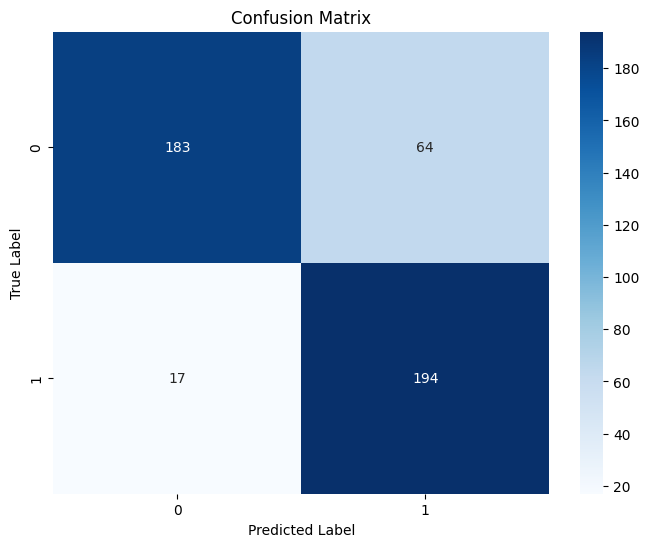

In [39]:
preprocessed_conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(preprocessed_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=nb_preprocessed_classifier.classes_,
            yticklabels=nb_preprocessed_classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##With next word negation

In [40]:
X_train, X_test, y_train, y_test = train_test_split(train_df['stopword_removed_nwn_processed'], train_df['sentiment_label'], test_size=0.3, random_state=42)

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

joblib.dump(vectorizer, 'nb_nwn_vectorizer.pkl')

nb_nwn_classifier = MultinomialNB()
nb_nwn_classifier.fit(X_train_vec, y_train)

joblib.dump(nb_nwn_classifier, 'nb_nwn_classifier.pkl')

y_pred = nb_nwn_classifier.predict(X_test_vec)

nb_nwn_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", nb_nwn_accuracy)

Accuracy: 0.8864628820960698


###Confusion Matrix

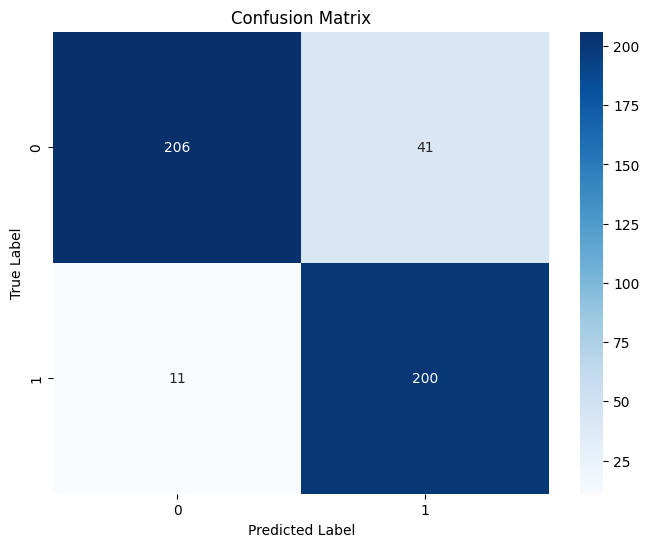

In [41]:
nwn_conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(nwn_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=nb_nwn_classifier.classes_,
            yticklabels=nb_nwn_classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##With antonym

In [42]:
X_train, X_test, y_train, y_test = train_test_split(train_df['stopword_removed_antonym_processed'], train_df['sentiment_label'], test_size=0.3, random_state=42)

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

joblib.dump(vectorizer, 'nb_antonym_vectorizer.pkl')

nb_antonym_classifier = MultinomialNB()
nb_antonym_classifier.fit(X_train_vec, y_train)

joblib.dump(nb_antonym_classifier, 'nb_antonym_classifier.pkl')

y_pred = nb_antonym_classifier.predict(X_test_vec)

nb_antonym_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", nb_antonym_accuracy)

Accuracy: 0.8253275109170306


###Confusion Matrix

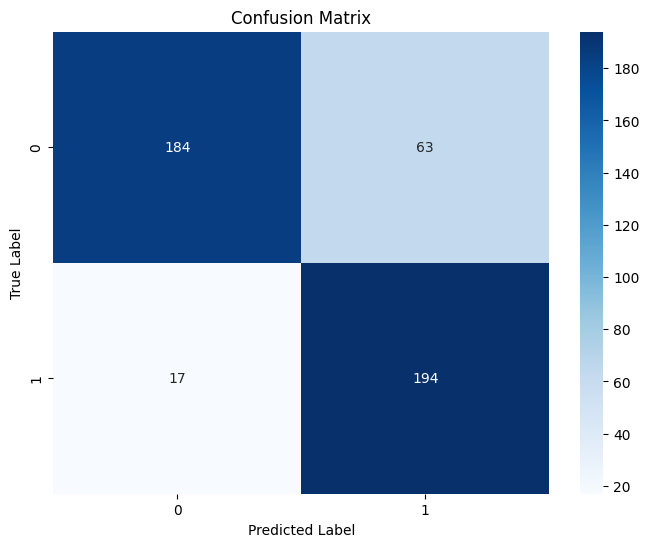

In [43]:
antonym_conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(antonym_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=nb_antonym_classifier.classes_,
            yticklabels=nb_antonym_classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##Combine the accuracy

In [44]:
NB_accuracies = {
    'processed_accuracy': [nb_preprocessed_accuracy],
    'nwn_accuracy': [nb_nwn_accuracy],
    'antonym_accuracy': [nb_antonym_accuracy]
}

nb_acc = pd.DataFrame(NB_accuracies, index=['Naive Bayes'])
nb_acc

,processed_accuracy,nwn_accuracy,antonym_accuracy
Naive Bayes,0.823144,0.886463,0.825328


#SVM

##Only preprocessed

In [45]:
X_train, X_test, y_train, y_test = train_test_split(train_df['stopword_removed_processed'], train_df['sentiment_label'], test_size=0.3, random_state=42)

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

joblib.dump(vectorizer, 'svm_preprocessed_vectorizer.pkl')

svm_preprocessed_classifier = SVC(kernel='rbf')
svm_preprocessed_classifier.fit(X_train_vec, y_train)

joblib.dump(svm_preprocessed_classifier, 'svm_preprocessed_classifier.pkl')

y_pred = svm_preprocessed_classifier.predict(X_test_vec)

svm_preprocessed_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", svm_preprocessed_accuracy)

Accuracy: 0.8755458515283843


###Confusion Matrix

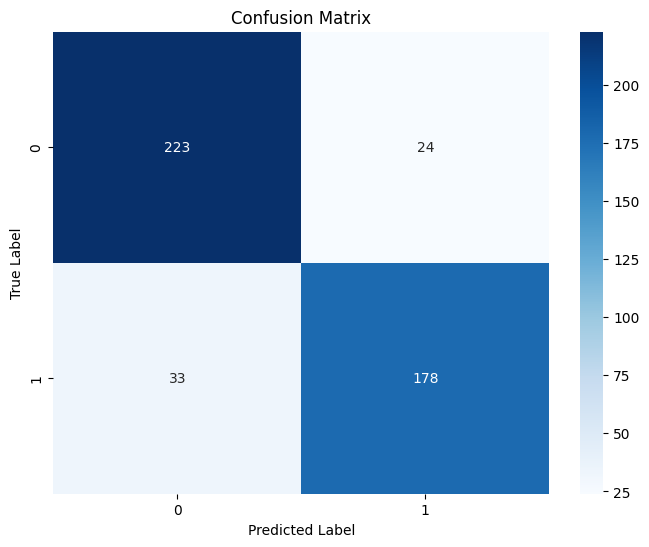

In [46]:
preprocessed_conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(preprocessed_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=svm_preprocessed_classifier.classes_,
            yticklabels=svm_preprocessed_classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##With next word negation

In [47]:
X_train, X_test, y_train, y_test = train_test_split(train_df['stopword_removed_nwn_processed'], train_df['sentiment_label'], test_size=0.3, random_state=42)

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

joblib.dump(vectorizer, 'svm_nwn_vectorizer.pkl')

svm_nwn_classifier = SVC(kernel='rbf')
svm_nwn_classifier.fit(X_train_vec, y_train)

joblib.dump(svm_nwn_classifier, 'svm_nwn_classifier.pkl')

y_pred = svm_nwn_classifier.predict(X_test_vec)

svm_nwn_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", svm_nwn_accuracy)

Accuracy: 0.8930131004366813


###Confusion Matrix

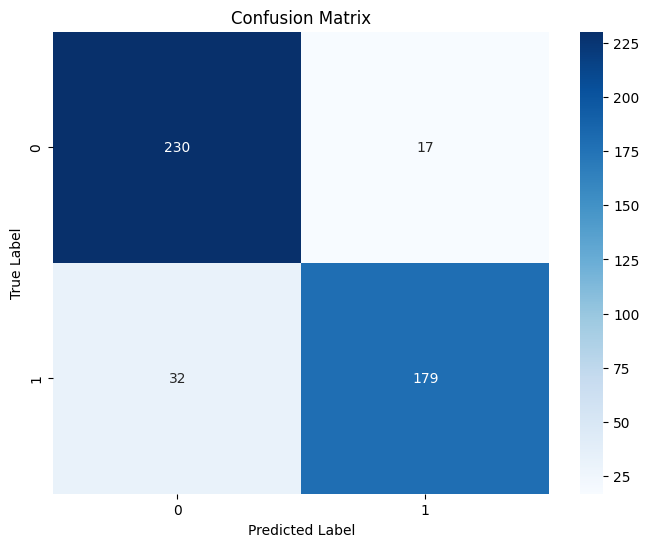

In [48]:
nwn_conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(nwn_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=svm_nwn_classifier.classes_,
            yticklabels=svm_nwn_classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##After swapped with antonym

In [49]:
X_train, X_test, y_train, y_test = train_test_split(train_df['stopword_removed_antonym_processed'], train_df['sentiment_label'], test_size=0.3, random_state=42)

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

joblib.dump(vectorizer, 'svm_antonym_vectorizer.pkl')

svm_antonym_classifier = SVC(kernel='rbf')
svm_antonym_classifier.fit(X_train_vec, y_train)

joblib.dump(svm_antonym_classifier, 'svm_antonym_classifier.pkl')

y_pred = svm_antonym_classifier.predict(X_test_vec)

svm_antonym_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", svm_antonym_accuracy)

Accuracy: 0.87117903930131


###Confusion Matrix

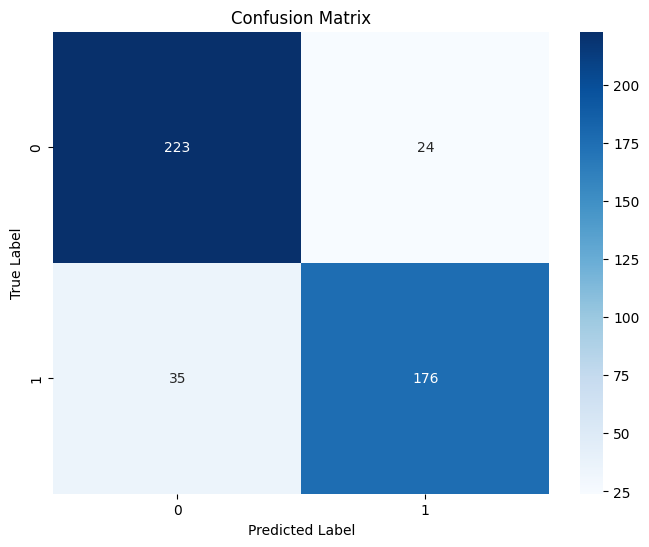

In [50]:
antonym_conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(antonym_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=svm_antonym_classifier.classes_,
            yticklabels=svm_antonym_classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##Combine the accuracy

In [51]:
svm_data = {
    'processed_accuracy': [svm_preprocessed_accuracy],
    'nwn_accuracy': [svm_nwn_accuracy],
    'antonym_accuracy': [svm_antonym_accuracy]
}

model_acc = pd.concat([nb_acc, pd.DataFrame(svm_data, index=['SVM'])])
model_acc

,processed_accuracy,nwn_accuracy,antonym_accuracy
Naive Bayes,0.823144,0.886463,0.825328
SVM,0.875546,0.893013,0.871179


In [52]:
train_df.to_csv('train_df_processed.csv')

#Pipeline

1. Preprocessed
2. Combine "nya" with the previous word
3. Combine "di" with the next word
4. Apply typo correction
5. Apply next word negation
6. Apply antonym swapping
7. Apply stopword removal on preprocessed only
8. Apply stopword removal on next word negation
9. Apply stopword removal on antonym swapping

In [53]:
import joblib

def preprocess_pipeline(df, text_column):
    # Preprocess
    df['preprocessed'] = df[text_column].apply(preprocess)
    df["preprocessed"] = df["preprocessed"].str[2:]

    # Combine "nya" with previous word
    df['combined_nya'] = df['preprocessed'].apply(combine_nya_with_previous)

    # Combine "di" with previous word
    df['combined_di'] = df['combined_nya'].apply(combine_di_with_next)

    # Apply typo correction
    df['typo_corrected'] = df['combined_di'].apply(correct_typo)

    # Apply next word negation
    df['after_nwn_text'] = df['typo_corrected'].apply(next_word_negation)

    # Apply antonym swapping
    df['after_antonym_text'] = df['typo_corrected'].apply(swap_antonyms)

    # Remove stopwords on preprocessed only
    df["stopword_removed_processed"] = df["typo_corrected"].apply(
        lambda text: " ".join([word for word in text.split() if word not in stopwords])
    )

    # Remove stopwords on next word negation
    df["stopword_removed_nwn_processed"] = df["after_nwn_text"].apply(
        lambda text: " ".join([word for word in text.split() if word not in stopwords])
    )

    # Remove stopwords on antonym swapping
    df["stopword_removed_antonym_processed"] = df["after_antonym_text"].apply(
        lambda text: " ".join([word for word in text.split() if word not in stopwords])
    )

    return df

#Testing

In [54]:
processed_df = preprocess_pipeline(test_df, test_df.columns[0])
#processed_df

In [55]:
y_test = processed_df['sentiment_label']

In [56]:
model_vectorizer_data = {
    'nb_preprocessed': ('nb_preprocessed_classifier.pkl', 'nb_preprocessed_vectorizer.pkl', 'stopword_removed_processed'),
    'nb_nwn': ('nb_nwn_classifier.pkl', 'nb_nwn_vectorizer.pkl', 'stopword_removed_nwn_processed'),
    'nb_antonym': ('nb_antonym_classifier.pkl', 'nb_antonym_vectorizer.pkl', 'stopword_removed_antonym_processed'),
    'svm_preprocessed': ('svm_preprocessed_classifier.pkl', 'svm_preprocessed_vectorizer.pkl', 'stopword_removed_processed'),
    'svm_nwn': ('svm_nwn_classifier.pkl', 'svm_nwn_vectorizer.pkl', 'stopword_removed_nwn_processed'),
    'svm_antonym': ('svm_antonym_classifier.pkl', 'svm_antonym_vectorizer.pkl', 'stopword_removed_antonym_processed')
}

accuracies = {}
for model_name, (model_file, vectorizer_file, text_column) in model_vectorizer_data.items():
    model = joblib.load(model_file)
    vectorizer = joblib.load(vectorizer_file)

    X_test_vec = vectorizer.transform(processed_df[text_column])
    y_pred = model.predict(X_test_vec)

    accuracy = accuracy_score(y_test, y_pred)

    accuracies[model_name] = accuracy

best_model = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model]

accuracy_df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])


print(f"The best model is {best_model} with an accuracy of {best_accuracy:.4f}")
accuracy_df

The best model is nb_nwn with an accuracy of 0.8941


,Model,Accuracy
0,nb_preprocessed,0.870588
1,nb_nwn,0.894118
2,nb_antonym,0.876471
3,svm_preprocessed,0.882353
4,svm_nwn,0.888235
5,svm_antonym,0.888235


In [57]:
accuracy_df['Accuracy']

0    0.870588
1    0.894118
2    0.876471
3    0.882353
4    0.888235
5    0.888235
Name: Accuracy, dtype: float64

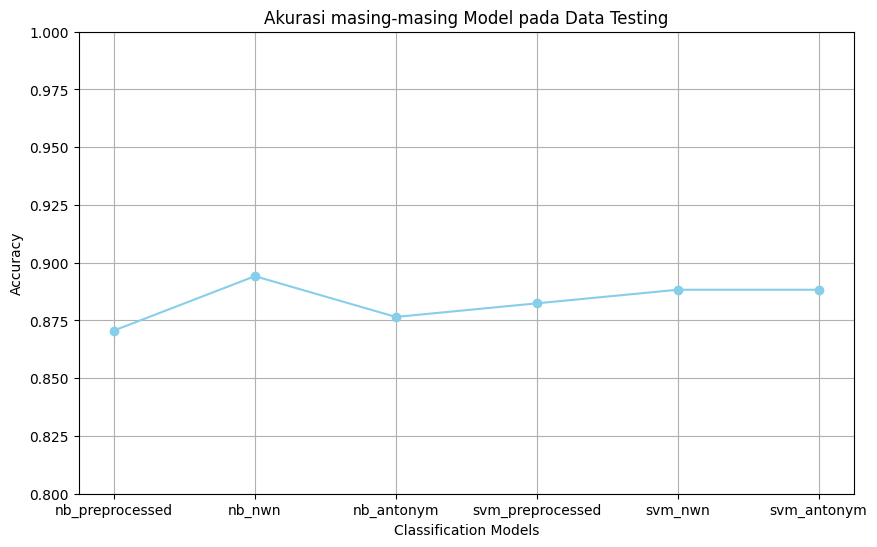

In [58]:
model_names = accuracy_df['Model']
accuracy_scores = accuracy_df['Accuracy']

plt.figure(figsize=(10, 6))
plt.plot(model_names, accuracy_scores, marker='o', color='skyblue', linestyle='-')
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Akurasi masing-masing Model pada Data Testing')
plt.ylim(0.8, 1)
plt.grid(True)
plt.show()

In [60]:
processed_df

,text,rating,sentiment_label,preprocessed,combined_nya,combined_di,typo_corrected,after_nwn_text,after_antonym_text,stopword_removed_processed,stopword_removed_nwn_processed,stopword_removed_antonym_processed
923,"mantaaaap, barang sudah diterima",5,1,mantaaaap barang sudah diterima,mantaaaap barang sudah diterima,mantaaaap barang sudah diterima,mantaaaap barang sudah diterima,mantaaaap barang sudah diterima,mantaaaap barang sudah diterima,mantaaaap barang diterima,mantaaaap barang diterima,mantaaaap barang diterima
697,"Udah sampe,udh dicoba, lancar jaya gan\r\n\r\n...",5,1,udah sampe udh dicoba lancar jaya gan r r th...,udah sampe udh dicoba lancar jaya gan r r thx ...,udah sampe udh dicoba lancar jaya gan r r thx ...,udah sampe sudah dicoba lancar jaya gan r r te...,udah sampe sudah dicoba lancar jaya gan r r te...,udah sampe sudah dicoba lancar jaya gan r r te...,udah sampe dicoba lancar jaya gan r r terima k...,udah sampe dicoba lancar jaya gan r r terima k...,udah sampe dicoba lancar jaya gan r r terima k...
558,"Barang bagus,respon penjual cepat. Good seller",5,1,barang bagus respon penjual cepat good seller,barang bagus respon penjual cepat good seller,barang bagus respon penjual cepat good seller,barang bagus respon penjual cepat good seller,barang bagus respon penjual cepat good seller,barang bagus respon penjual cepat good seller,barang bagus respon penjual cepat good seller,barang bagus respon penjual cepat good seller,barang bagus respon penjual cepat good seller
551,Cukup baik. Sesuai harga,4,1,cukup baik sesuai harga,cukup baik sesuai harga,cukup baik sesuai harga,cukup baik sesuai harga,cukup baik sesuai harga,cukup baik sesuai harga,cukup baik sesuai harga,cukup baik sesuai harga,cukup baik sesuai harga
1686,trimakasih brg sdh diterima dgn baik,5,1,trimakasih brg sdh diterima dgn baik,trimakasih brg sdh diterima dgn baik,trimakasih brg sdh diterima dgn baik,trimakasih barang sudah diterima dgn baik,trimakasih barang sudah diterima dgn baik,trimakasih barang sudah diterima dgn baik,trimakasih barang diterima dgn baik,trimakasih barang diterima dgn baik,trimakasih barang diterima dgn baik
...,...,...,...,...,...,...,...,...,...,...,...,...
1476,Batere nya cpt habis..????,2,0,batere nya cpt habis,baterenya cpt habis,baterenya cpt habis,baterenya cepat habis,baterenya cepat habis,baterenya cepat habis,baterenya cepat habis,baterenya cepat habis,baterenya cepat habis
741,"Ternyata bahannya gk bs melar,,jd wlwpun bebas...",2,0,ternyata bahannya gk bs melar jd wlwpun bebas...,ternyata bahannya gk bs melar jd wlwpun bebas ...,ternyata bahannya gk bs melar jd wlwpun bebas ...,ternyata bahannya gk bisa melar jadi wlwpun be...,ternyata bahannya gk bisa melar jadi wlwpun be...,ternyata bahannya gk bisa melar jadi wlwpun be...,ternyata bahannya gk melar jadi wlwpun bebas s...,ternyata bahannya gk melar jadi wlwpun bebas s...,ternyata bahannya gk melar jadi wlwpun bebas s...
1670,Agak beda dengan gambar produk yg dipajang (me...,1,0,agak beda dengan gambar produk yg dipajang me...,agak beda dengan gambar produk yg dipajang mer...,agak beda dengan gambar produk yg dipajang mer...,agak beda dengan gambar produk yang dipajang m...,agak beda dengan gambar produk yang dipajang m...,agak beda dengan gambar produk yang dipajang m...,beda gambar produk dipajang merk amp bungkusny...,beda gambar produk dipajang merk amp bungkusny...,beda gambar produk dipajang merk amp bungkusny...
1070,Amat sangat mengecewakan. Saya batalkan pembel...,2,0,amat sangat mengecewakan saya batalkan pembel...,amat sangat mengecewakan saya batalkan pembeli...,amat sangat mengecewakan saya batalkan pembeli...,amat sangat mengecewakan saya batalkan pembeli...,amat sangat mengecewakan saya batalkan pembeli...,amat sangat mengecewakan saya batalkan pembeli...,sangat mengecewakan batalkan pembelian dikaren...,sangat mengecewakan batalkan pembelian dikaren...,sangat mengecewakan batalkan pembelian dikaren...


#Review

In [59]:
unlabeled_text_data = ['barangnya gk bagus, jelek dipake',
                       'Barang sesuai pesanan dan cepat sampai']

In [60]:
from collections import Counter

ensemble_predictions = []

for model_name, (model_file, vectorizer_file, text_column) in model_vectorizer_data.items():
    model = joblib.load(model_file)
    vectorizer = joblib.load(vectorizer_file)

    X_new_vec = vectorizer.transform(unlabeled_text_data)
    y_pred = model.predict(X_new_vec)

    print(f"\nPredictions from {model_name} model:")
    for j, predicted_class in enumerate(y_pred):
        # if predicted_class == 0:
        #     predicted_class = 'negative'
        # elif predicted_class == 1:
        #     predicted_class = 'positive'
        print(f"  Data point {j+1}: Predicted class = {predicted_class}")


Predictions from nb_preprocessed model:
  Data point 1: Predicted class = 0
  Data point 2: Predicted class = 1

Predictions from nb_nwn model:
  Data point 1: Predicted class = 0
  Data point 2: Predicted class = 1

Predictions from nb_antonym model:
  Data point 1: Predicted class = 0
  Data point 2: Predicted class = 1

Predictions from svm_preprocessed model:
  Data point 1: Predicted class = 0
  Data point 2: Predicted class = 1

Predictions from svm_nwn model:
  Data point 1: Predicted class = 0
  Data point 2: Predicted class = 1

Predictions from svm_antonym model:
  Data point 1: Predicted class = 0
  Data point 2: Predicted class = 1
